In [2]:
# Hyperbola and Synthetic Seismogram Analysis
# Analysis of reflection hyperbolas and generation of synthetic seismograms

import sys

sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from raypaths import generate_hyperbola_curves
from synthetic_seismograms import (ricker_wavelet, generate_synthetic_seismogram,
                                 plot_hyperbola_curves, plot_seismogram,
                                 plot_comparison_seismograms)

In [3]:
# Set plot style
plt.style.use('seaborn-v0_8-white')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True

# Configuration parameters
# -----------------------
source_x = 0  # Source position
n_receivers = 100
receiver_x = np.linspace(-1500, 1500, n_receivers)

# Model parameters
reflector_depth = 400  # meters
velocity = 2000  # m/s

# Time parameters for seismogram
duration = 1.2  # seconds
dt = 0.002  # seconds
frequency = 25  # Hz

# Dip angles to analyze
dip_angles = [0, 15, 30]  # degrees

# Generate hyperbola curves
hyperbolas = generate_hyperbola_curves(source_x, receiver_x, reflector_depth, velocity, dip_angles)

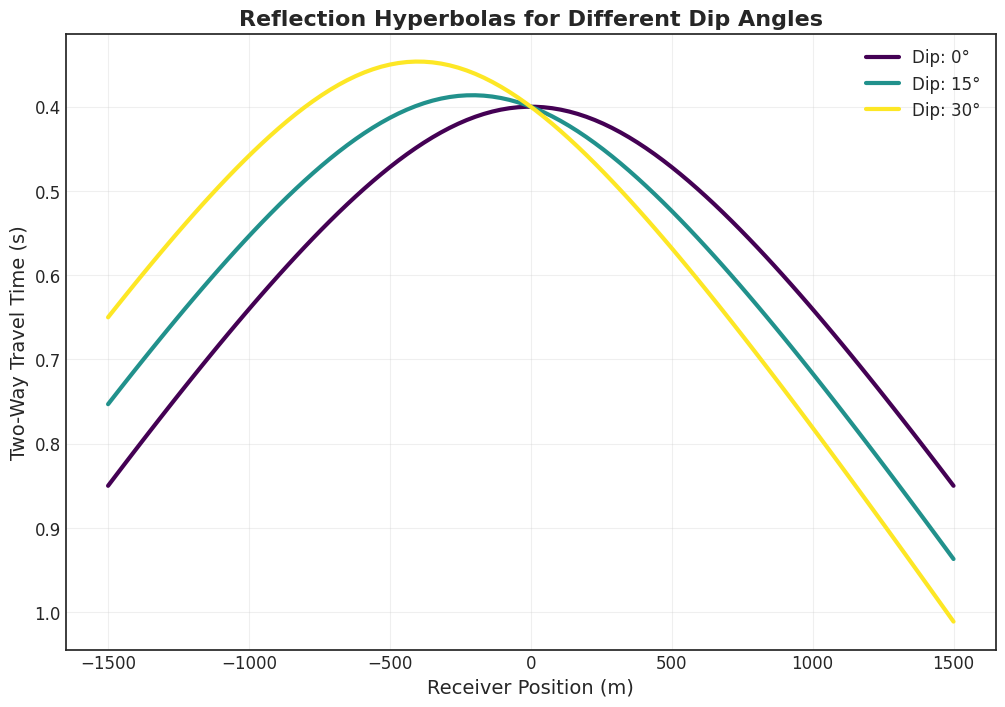

In [4]:
# Plot hyperbola curves
fig1, ax1 = plot_hyperbola_curves(receiver_x, hyperbolas, 'Reflection Hyperbolas for Different Dip Angles')
plt.show()

In [5]:
# Generate Ricker wavelet
t, wavelet = ricker_wavelet(frequency, 0.15, dt)

# Generate synthetic seismograms
seismograms = {}

for angle, travel_times in hyperbolas.items():
    seismogram = generate_synthetic_seismogram(travel_times, wavelet, duration, dt, 0.02)
    seismograms[angle] = seismogram


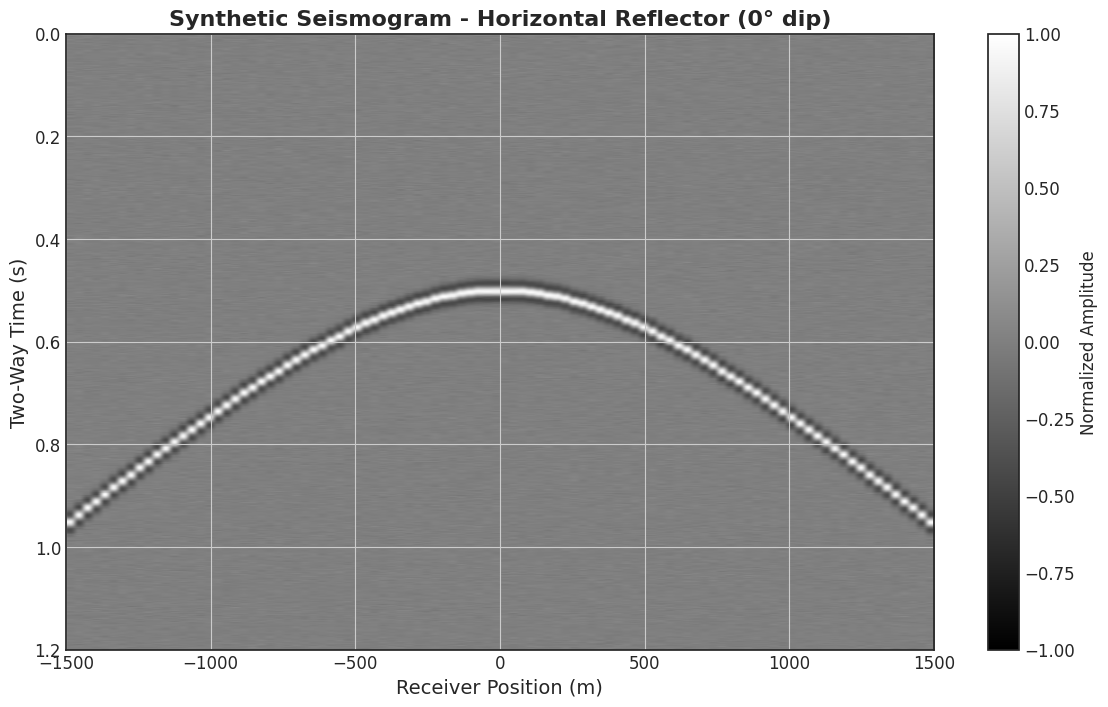

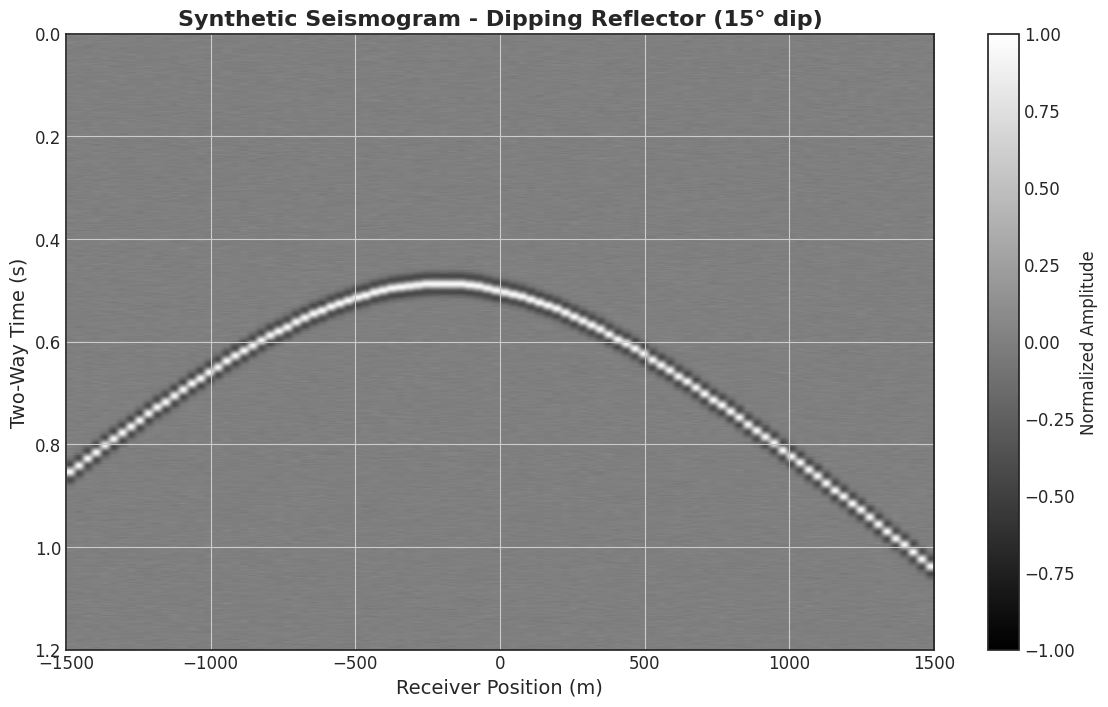

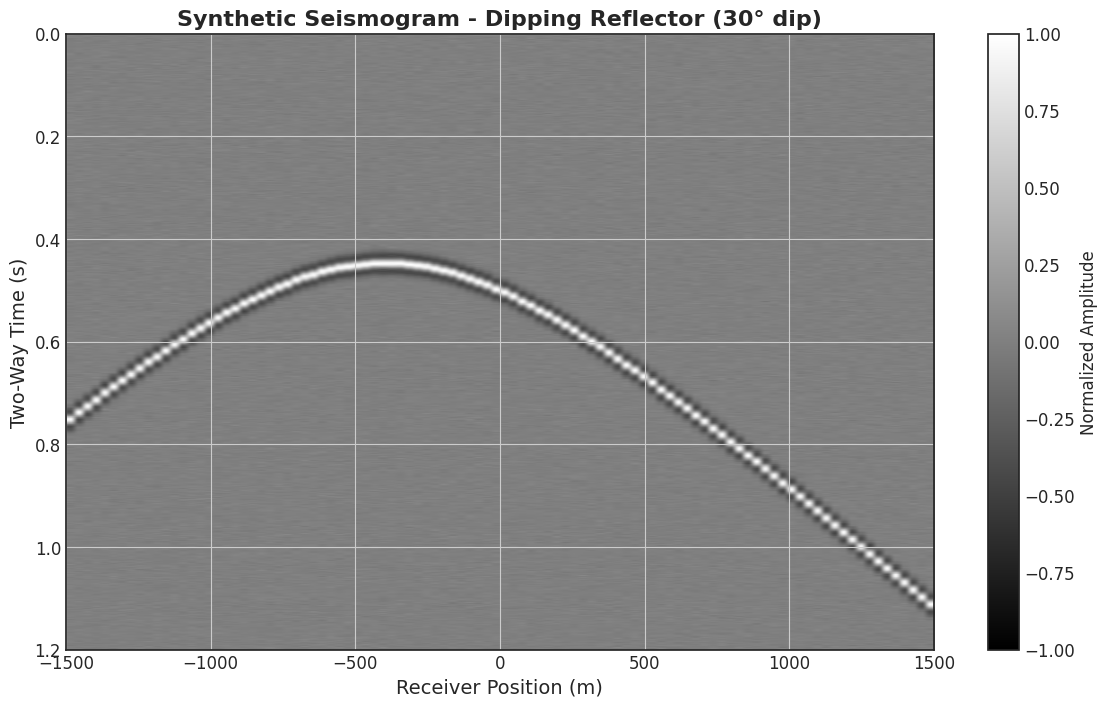

In [6]:
# Plot individual seismograms

# Horizontal reflector (0° dip)
fig2, ax2 = plot_seismogram(seismograms[0], receiver_x, duration, 'Synthetic Seismogram - Horizontal Reflector (0° dip)')
plt.show()

# Dipping reflector (15° dip)
fig3, ax3 = plot_seismogram(seismograms[15], receiver_x, duration, 'Synthetic Seismogram - Dipping Reflector (15° dip)')
plt.show()

# Dipping reflector (30° dip)
fig4, ax4 = plot_seismogram(seismograms[30], receiver_x, duration, 'Synthetic Seismogram - Dipping Reflector (30° dip)')
plt.show()